In [24]:
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

from pathlib import Path
# Determine the locations of auxiliary libraries and datasets.
if IN_COLAB:
    google.colab.drive.mount("/content/drive")
    
    # Change this if you created the shortcut in a different location
    AUX_DATA_ROOT = Path("/content/drive/My Drive/[F20] Intro to CV/chest_xray")
    
    assert AUX_DATA_ROOT.is_dir(), "Have you forgot to 'Add a shortcut to Drive'?"
    
    import sys
    sys.path.insert(0, str(AUX_DATA_ROOT))
else:
    AUX_DATA_ROOT = Path(".")

Mounted at /content/drive


In [25]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
!pip install imgaug
import imgaug.augmenters as iaa

# Loading data

In [26]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 200

def load_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_ind = labels.index(label)
        for img in os.listdir(path):
            try:
                img_raw = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                img_res = cv2.resize(img_raw, (img_size, img_size))
                data.append([img_res, class_ind])
            except Exception as e:
                print(e)
    return np.array(data)

In [27]:
train = load_data(f"{AUX_DATA_ROOT}/train")
test = load_data(f"{AUX_DATA_ROOT}/test")
val = load_data(f"{AUX_DATA_ROOT}/val")

In [ ]:
!wget https://www.dropbox.com/s/1fo6cdgx0yc2syc/new%20data.zip?dl=1 -O new_data.zip
!unzip new_data.zip

In [20]:
from os import listdir
from os.path import isfile, join

new_data_dir="/content/new data"
new_files = [f for f in listdir(new_data_dir) if (isfile(join(new_data_dir, f)) and f!=".DS_Store")]

In [23]:
new_data = []
for fpath in new_files:
    img_raw = cv2.imread(join(new_data_dir, fpath), cv2.IMREAD_GRAYSCALE)
    img_res = cv2.resize(img_raw, (img_size, img_size))
    new_data.append([img_res, 0])
train = np.vstack((train, np.array(new_data)))

# Data Augmentation

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


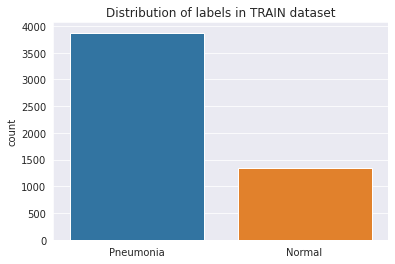

In [28]:
l = []
for t in train:
    if(t[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l).set_title("Distribution of labels in TRAIN dataset")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


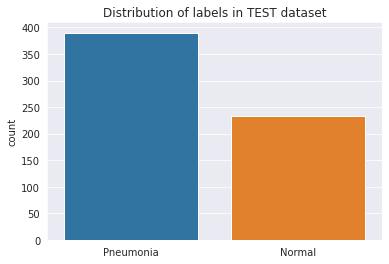

In [29]:
l = []
for t in test:
    if(t[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l).set_title("Distribution of labels in TEST dataset")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


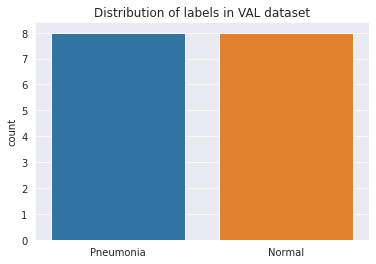

In [30]:
l = []
for t in val:
    if(t[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l).set_title("Distribution of labels in VAL dataset")
plt.show()

In [31]:
seq = iaa.OneOf([
    iaa.Fliplr(), # horizontal flips
    iaa.Affine(rotate=10), # roatation
    iaa.Multiply((1.1, 1.4))]) #random brightness

## Train

In [32]:
train_normal=0
train_pn=0

for t in train:
    if(t[1] == 0):
        train_pn+=1
    else:
        train_normal+=1

new_imgs_train = []

for or_img, lab in train:
  if train_normal+1>train_pn:
    break
  if lab==0:
    continue
  else:
    aug_img1 = seq.augment_image(or_img)
    aug_img2 = seq.augment_image(or_img)
    new_imgs_train.append([aug_img1,lab])
    new_imgs_train.append([aug_img2,lab])
    train_normal+=2

In [33]:
len(new_imgs_train)

2534

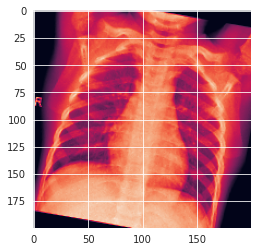

In [34]:
plt.imshow(new_imgs_train[10][0])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


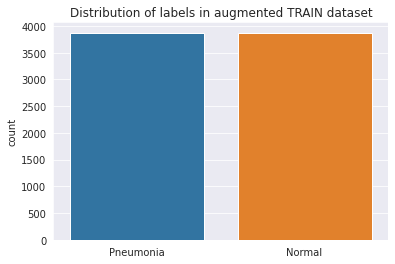

In [35]:
train_aug = np.append(train, new_imgs_train,0)

l = []
for t in train_aug:
    if(t[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l).set_title("Distribution of labels in augmented TRAIN dataset")
plt.show()

## Test

In [36]:
test_normal=0
test_pn=0

for t in test:
    if(t[1] == 0):
        test_pn+=1
    else:
        test_normal+=1

new_imgs_test = []

for or_img, lab in test:
  if test_normal+1>test_pn:
    break
  if lab==0:
    continue
  else:
    aug_img1 = seq.augment_image(or_img)
    aug_img2 = seq.augment_image(or_img)
    new_imgs_test.append([aug_img1,lab])
    new_imgs_test.append([aug_img2,lab])
    test_normal+=2

In [37]:
len(new_imgs_test)

156

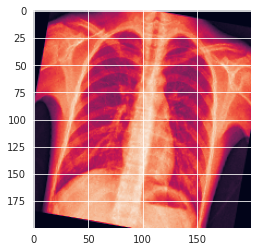

In [38]:
plt.imshow(new_imgs_test[10][0])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


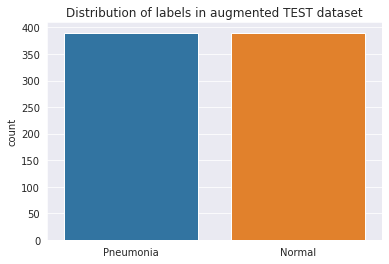

In [39]:
test_aug = np.append(test, new_imgs_test,0)

l = []
for t in test_aug:
    if(t[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l).set_title("Distribution of labels in augmented TEST dataset")
plt.show()

## Val

In [40]:
new_imgs_val = []

for or_img, lab in val:
  aug_img1 = seq.augment_image(or_img)
  aug_img2 = seq.augment_image(or_img)
  new_imgs_val.append([aug_img1,lab])
  new_imgs_val.append([aug_img2,lab])

In [41]:
len(new_imgs_val)

32

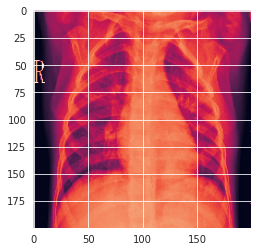

In [42]:
plt.imshow(new_imgs_val[10][0])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


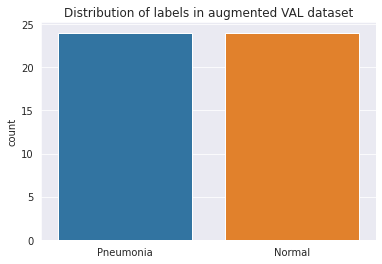

In [43]:
val_aug = np.append(val, new_imgs_val,0)

l = []
for t in val_aug:
    if(t[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l).set_title("Distribution of labels in augmented VAL dataset")
plt.show()

# HOG feature extraction

## With augmentaion

In [ ]:
from skimage.transform import resize
from skimage.feature import hog

In [ ]:
train_aug_hog=train_aug.copy()

In [ ]:
for t in train_aug_hog:
  t[0] = resize(t[0], (128,64))

In [ ]:
train_aug_hog[0][0].shape

(128, 64)

In [ ]:
new_boxes=[]
for b in train_aug_hog:
    df = hog(b[0],orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)#, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualize=False)
    new_boxes.append(df)
hog_features_aug_train = np.array(new_boxes, 'float64')

In [ ]:
test_aug_hog=test_aug.copy()

In [ ]:
for t in test_aug:
  t[0] = resize(t[0], (128,64))

In [ ]:
new_boxes=[]
for b in test_aug:
    df = hog(b[0],orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)#, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualize=False)
    new_boxes.append(df)
hog_features_aug_test = np.array(new_boxes, 'float64')

In [ ]:
hog_features_aug_train.shape

(7750, 3780)

## Without augmentaion

In [ ]:
train_hog=train.copy()

for t in train_hog:
  t[0] = resize(t[0], (128,64))

new_boxes=[]
for b in train_hog:
    df = hog(b[0],orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)#, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualize=False)
    new_boxes.append(df)
hog_features_train = np.array(new_boxes, 'float64')

In [ ]:
test_hog=test.copy()
for t in test_hog:
  t[0] = resize(t[0], (128,64))

new_boxes=[]
for b in test_hog:
    df = hog(b[0],orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)#, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualize=False)
    new_boxes.append(df)
hog_features_test = np.array(new_boxes, 'float64')

In [ ]:
hog_features_train.shape

(5216, 3780)

# LBP Feature extraction

In [44]:
from skimage import feature
def lbp_hist(gray_img, points=24, rad=8):
  #"uniform" is preferred for rotation and grayscale invariance
  lbp = feature.local_binary_pattern(gray_img, P=points, R=rad, method="uniform")
  hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, points+3), range=(0, points+2))
  hist = hist.astype("float")
  hist /= hist.sum()
  return hist

In [45]:
def preprocess_dataset(data, points=24, radius=3):
  new_data = []
  for row in data:
    new_data.append(lbp_hist(gray_img=row[0], points=points, rad=radius))
  
  return np.array(new_data), data[:, 1].astype('int')

## With augmentaion

In [46]:
X_aug_train, y_aug_train = preprocess_dataset(train_aug)
X_aug_val, y_aug_val = preprocess_dataset(val_aug)
X_aug_test, y_aug_test = preprocess_dataset(test_aug)

In [47]:
X_aug_test, y_aug_test = np.concatenate((X_aug_test, X_aug_val), axis=0), np.concatenate((y_aug_test, y_aug_val), axis=0)
np.random.seed(42)
temp = list(zip(X_aug_test, y_aug_test))
np.random.shuffle(temp)
X_aug_test, y_aug_test = zip(*temp)
X_aug_test, y_aug_test = np.array(X_aug_test), np.array(y_aug_test)
for i in range(X_aug_test.shape[0]):
  X_aug_test[i] = X_aug_test[i].reshape(1, -1)

## Without augmentaion

In [ ]:
X_train, y_train = preprocess_dataset(train)
X_val, y_val = preprocess_dataset(val)
X_test, y_test = preprocess_dataset(test)

In [ ]:
X_test, y_test = np.concatenate((X_test, X_val), axis=0), np.concatenate((y_test, y_val), axis=0)
np.random.seed(42)
temp = list(zip(X_test, y_test))
np.random.shuffle(temp)
X_test, y_test = zip(*temp)
X_test, y_test = np.array(X_test), np.array(y_test)
for i in range(X_test.shape[0]):
  X_test[i] = X_test[i].reshape(1, -1)

# SVM+HOG

## With augmentation

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
clf = SVC()

In [ ]:
labels_aug_train=[]
for t in train_aug_hog:
  labels_aug_train.append(t[1])


In [ ]:
labels_aug_test=[]
for t in test_aug_hog:
  labels_aug_test.append(t[1])

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=10, n_jobs=-1)

In [ ]:
grid_search.fit(hog_features_aug_train, labels_aug_train)
print("Accuracy on test set: {:.2f}".format(grid_search.score(hog_features_aug_test, labels_aug_test)))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 47.9min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 60.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 81.8min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 99.2min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 124.8min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 141.4min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 163.8min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 185.8min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 202.6min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 226.9min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elaps

Accuracy on test set: 0.71


In [ ]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [ ]:
best_hog_aug_svc = grid_search.best_estimator_

In [ ]:
labels_hog_aug_pred = best_hog_aug_svc.predict(hog_features_test)
print(accuracy_score(labels_test,labels_hog_aug_pred))

0.708974358974359


<Figure size 432x288 with 0 Axes>

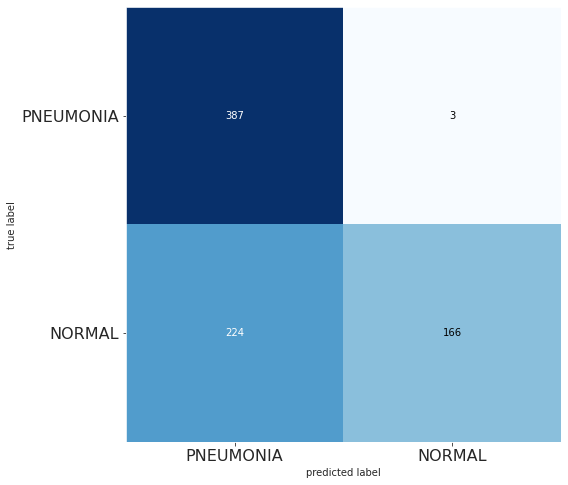

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Get the confusion matrix
cm  = confusion_matrix(labels_aug_test, labels_hog_aug_pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['PNEUMONIA', 'NORMAL'], fontsize=16)
plt.yticks(range(2), ['PNEUMONIA', 'NORMAL'], fontsize=16)
plt.show()

## Without augmentation

In [ ]:
clf = SVC()

In [ ]:
labels_train=[]
for t in train_hog:
  labels_train.append(t[1])

labels_test=[]
for t in test_hog:
  labels_test.append(t[1])

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVC(kernel="linear"), param_grid, cv=5, verbose=20, n_jobs=-1)

grid_search.fit(hog_features_train, labels_train)
print("Accuracy on test set: {:.2f}".format(grid_search.score(hog_features_test, labels_test)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  3

Accuracy on test set: 0.75


In [ ]:
grid_search.best_params_

{'C': 0.01, 'gamma': 0.001}

In [ ]:
best_hog_svc = grid_search.best_estimator_
labels_hog_pred = best_hog_svc.predict(hog_features_test)
print(accuracy_score(labels_test,labels_hog_pred))

0.7532051282051282


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, labels_hog_pred, target_names=['PNEUMONIA', 'NORMAL']))

              precision    recall  f1-score   support

   PNEUMONIA       0.72      0.99      0.83       390
      NORMAL       0.98      0.35      0.52       234

    accuracy                           0.75       624
   macro avg       0.85      0.67      0.68       624
weighted avg       0.82      0.75      0.71       624



<Figure size 432x288 with 0 Axes>

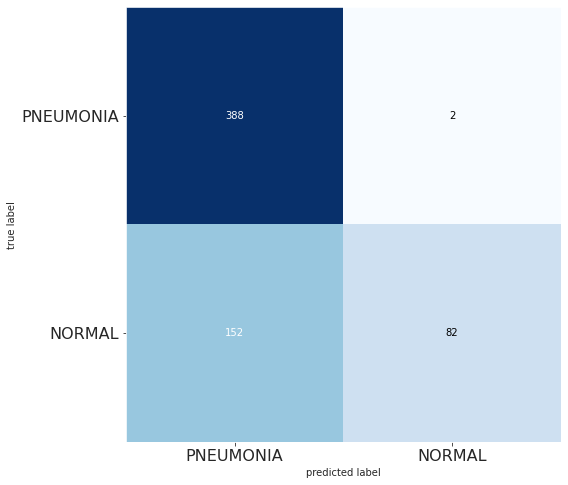

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Get the confusion matrix
cm  = confusion_matrix(labels_test, labels_hog_pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['PNEUMONIA', 'NORMAL'], fontsize=16)
plt.yticks(range(2), ['PNEUMONIA', 'NORMAL'], fontsize=16)
plt.show()

In [ ]:
for i in range(len(labels_test)):
  if labels_test[i] == 0 and labels_hog_pred[i]==1:
    print(i)

157
212


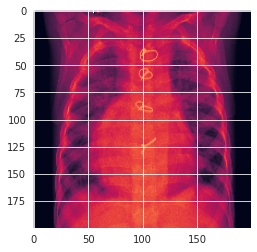

In [ ]:
plt.imshow(train[157][0])
plt.show()

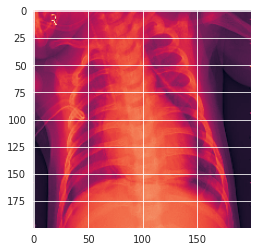

In [ ]:
plt.imshow(train[212][0])
plt.show()

# SVM+LBP

## With augmentation

In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

C_vals = np.logspace(start=-1, stop=4, num=10, endpoint=True, dtype=float)
params = {'C': C_vals,
           'gamma': np.logspace(start=-1, stop=3, num=10)}
svc = SVC(kernel='rbf', random_state=42, verbose=True)
grid_search_lbp = GridSearchCV(svc, param_grid=params, n_jobs=-1, cv=5, verbose=2)

In [50]:
grid_search_lbp.fit(X=X_aug_train, y=y_aug_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 19.4min finished


[LibSVM]

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 3.59381366e-01, 1.291...83e+00,
       1.66810054e+01, 5.99484250e+01, 2.15443469e+02, 7.74263683e+02,
       2.78255940e+03, 1.00000000e+04]),
                         'gamma': array([1.00000000e-01, 2.78255940e-01, 7.74263683e-01, 2.15443469e+00,
       5.99484250e+00, 1.66810054e+01, 4.64158883e+01, 1.29154967e+02,
       3.59381366e+02, 1.00000000e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [51]:
grid_search_lbp.best_params_

{'C': 215.44346900318845, 'gamma': 1000.0}

In [57]:
from sklearn.metrics import accuracy_score
y_aug_test_pred = grid_search_lbp.best_estimator_.predict(X=X_aug_test)
print(accuracy_score(y_aug_test, y_aug_test_pred))
print(grid_search_lbp.best_estimator_.score(X=X_aug_test, y=y_aug_test))

0.7318840579710145
0.7318840579710145


In [55]:
print(classification_report(y_aug_test, y_aug_test_pred, target_names=['PNEUMONIA', 'NORMAL']))

              precision    recall  f1-score   support

   PNEUMONIA       0.67      0.90      0.77       414
      NORMAL       0.85      0.56      0.68       414

    accuracy                           0.73       828
   macro avg       0.76      0.73      0.72       828
weighted avg       0.76      0.73      0.72       828



<Figure size 432x288 with 0 Axes>

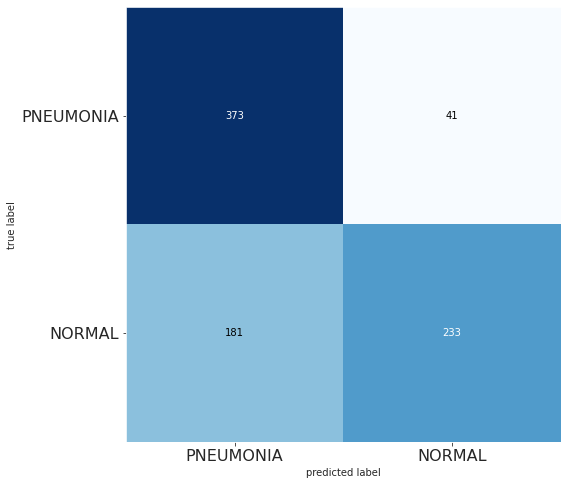

In [56]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Get the confusion matrix
cm  = confusion_matrix(y_aug_test, y_aug_test_pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['PNEUMONIA', 'NORMAL'], fontsize=16)
plt.yticks(range(2), ['PNEUMONIA', 'NORMAL'], fontsize=16)
plt.show()

## Without augmentation

In [ ]:
C_vals = np.logspace(start=-2, stop=4, num=15, endpoint=True, dtype=float)
params = {'C': C_vals,
           'gamma': np.logspace(start=-5, stop=5, num=15)}
svc = SVC(kernel='rbf', random_state=42, verbose=True)
grid_search_lbp = GridSearchCV(svc, param_grid=params, n_jobs=-1, cv=5, verbose=2)

In [ ]:
grid_search_lbp.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 1125 out of 1125 | elapsed: 13.0min finished


[LibSVM]

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 2.68269580e-02, 7.196...
       1.38949549e+03, 3.72759372e+03, 1.00000000e+04]),
                         'gamma': array([1.00000000e-05, 5.17947468e-05, 2.68269580e-04, 1.38949549e-03,
       7.19685673e-03, 3.72759372e-02, 1.93069773e-01, 1.00000000e+00,
       5.17947468e+00, 2.68269580e+01, 1.38949549e+02, 7.19685673e+02,
       3.72759372e+03, 1.93069773e+04, 1.00000000e+05])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
            

In [ ]:
grid_search_lbp.best_params_

{'C': 517.9474679231213, 'gamma': 26.826957952797272}

In [ ]:
y_test_pred = grid_search_lbp.best_estimator_.predict(X=X_test)
print(accuracy_score(y_test, y_test_pred))
print(grid_search_lbp.best_estimator_.score(X=X_test, y=y_test))

0.75625
0.75625


<Figure size 432x288 with 0 Axes>

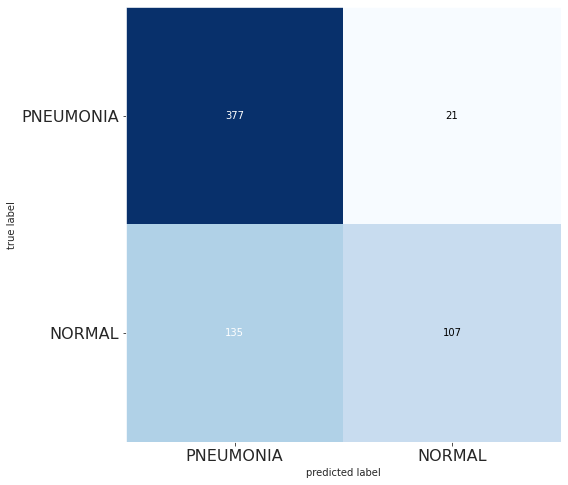

In [ ]:
# Get the confusion matrix
cm  = confusion_matrix(y_test, y_test_pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['PNEUMONIA', 'NORMAL'], fontsize=16)
plt.yticks(range(2), ['PNEUMONIA', 'NORMAL'], fontsize=16)
plt.show()